## Final Capstone Project : Exploring Toronto neighborhood for opening an Indian Restaurant



### Problem Statement:
Toronto. It's one of the most popular Canadian city among Indian and there is a thick population of Indian origin Canadian citizen observed in the city. Our business problem is to find out a suitable neighborhood in Toronto where one should consider to open Indian restaurant to attract and serve authentic Indian food to maximum customer which would help to expand the business among Indian population and to make it profitable.

### Target audience:
1. The Investor/Businessman who wants to invest in the Indian Restaurant startup and slowly expand their footprint in the segment to make it more profitable.

2. The professionals in different fields who wants to own an Indian restaurant will be beneficial from this project by understanding different pros and cons, the competition in the field one can expect, analyzing the expected customer footfall to generate profitability and to become a successful entrepreneur.

3. The Indian crowd living in areas who wants to taste the authentic food of India but having limited option will be beneficial from this project.

### Data Capture, Cleansing, Formatting
in order to execute the project, following dataset will be used.

#### 1. List of postal code and Neighborhood in Toronto Canada : 
Data will be downloaded from wiki to get the complete list of postal codes in Toronto along with Borough and neighborhoods.

(https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

#### 2. Geospatial data : 
In order to get the coordinates of different neighborhood downloaded above, geospatial data will be used.

(https://cocl.us/Geospatial_data)

#### 3. Ethnic population of Toronto: 
Success of a ethnic food chain depends on the ethnic population residing in the area of food chain. Toronto Ethnic population data will be used to find out densely Indian populated neighborhood to use in analysis.

(https://en.m.wikipedia.org/wiki/Demographics_of_Toronto#Ethnic_diversity)

#### 4. Location data using Foursquare API: 
To get different information, location about popular venues of Toronto, foursquare API will be used.

### Approach
We will use the location data and ethnic population data to find out those areas where dense Indian population is residing. With the help of venue details retrieved from foursquare, will get the areas having Indian restaurants
Then using K Means clustering and segmentation technique, will find out the areas having large indian population with less Indian restaurant which can be considered to open a Restaurant with high chance of maximum footfall and less competition.


##### Below Section will have data preperation for final project 

##### Importing Required libraries

In [3]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 
from sklearn.cluster import KMeans 

In [5]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [6]:
import folium

## Data Preperation

### 1. List of postal code and Neighborhood in Toronto Canada 
Downloading Toronto Neighbourhood data from wiki

In [7]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]
df

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
5,M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights ...,M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
6,M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union ...,M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
7,M1KScarborough(Kennedy Park / Ionview / East B...,M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / ...,M6KWest Toronto(Brockton / Parkdale Village / ...,M7KNot assigned,M8KNot assigned,M9KNot assigned
8,M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria ...,M6LNorth York(North Park / Maple Leaf Park / U...,M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
9,M1MScarborough(Cliffside / Cliffcrest / Scarbo...,M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and...,M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)


Creating an empty dataframe

In [8]:
df_toronto=pd.DataFrame(columns=['Postal Code','Borough','Neighborhood'])
df_toronto

,Postal Code,Borough,Neighborhood


Parsing unstructured data retrieved from wiki and convert into dataframe

In [9]:
for col_name, data in df.items():
    #print("data is:",data)
    for i in range(20):
        txt=data[i]
        c1=txt[0:3]
        sep='('
        pos=txt.find(sep)
        if pos>0:
            c2=txt[3:pos]
            c3=txt[pos+1:len(txt)-1].replace(" / ",",")
        else:
            c2=txt[3:]
            c3="Not assigned"
        df_toronto.loc[len(df_toronto.index)] = [c1,c2,c3] 
df_toronto.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M1B,Scarborough,"Malvern,Rouge"
2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek"
3,M1E,Scarborough,"Guildwood,Morningside,West Hill"
4,M1G,Scarborough,Woburn


Filtering and Cleansing Dataframe

In [10]:
df_toronto.drop(df_toronto[df_toronto['Borough'] == 'Not assigned'].index, inplace = True) 
df_toronto["Neighborhood"].loc[df_toronto["Neighborhood"]=="Not assigned"] = df_toronto["Borough"]
df_toronto[df_toronto["Neighborhood"]=="Not assigned"].count()
df.reset_index(inplace=True, drop=True)
print("Shape of Frame after filtering ",df_toronto.shape)

Shape of Frame after filtering  (103, 3)


In [11]:
df_toronto.head()

,Postal Code,Borough,Neighborhood
1,M1B,Scarborough,"Malvern,Rouge"
2,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek"
3,M1E,Scarborough,"Guildwood,Morningside,West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae


### 2. Geospatial data

Creating Dataframe of Toronto Postal Codes wise latitude and longitude

In [12]:
import requests
import io
datastr = requests.get("http://cocl.us/Geospatial_data",allow_redirects=True).text
data_file = io.StringIO(datastr)
geo=pd.read_csv(data_file)
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merging df_toronto and geo dataframe into single

In [13]:
df_toronto_geo=pd.merge(df_toronto, geo, on='Postal Code')
df_toronto_geo.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### 3. Ethnic population of Toronto

Loading ethinic population of Toronto from wikipedia using webscraping

In [14]:
pip install wikipedia

Note: you may need to restart the kernel to use updated packages.


In [31]:
import wikipedia as wp
html = wp.page("Demographics_of_Toronto").html().encode("UTF-8")
 
df_pop_tor_eyrk = pd.read_html(html)[12]  
df_pop_nyrk = pd.read_html(html)[13]  
df_pop_scrb = pd.read_html(html)[14]  
df_pop_eto = pd.read_html(html)[15]  

df_pop_tor_eyrk.head()


,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7,Ethnic Origin #9,%.8
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN


In [16]:
df_pop_nyrk.head()

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_pop_scrb.head()

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN


In [18]:
df_pop_eto.head()

,Riding,Population,Ethnic Origin #1,%,Ethnic Origin #2,%.1,Ethnic Origin #3,%.2,Ethnic Origin #4,%.3,Ethnic Origin #5,%.4,Ethnic Origin #6,%.5,Ethnic Origin #7,%.6,Ethnic Origin #8,%.7
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Getting location data using Foursquare API

In [19]:
# The code was removed by Watson Studio for sharing.

Function to get the venue details from Foursqaure in loop

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
#Toronto_venues = getNearbyVenues(names=df_toronto_geo['Neighborhood'],
#                                   latitudes=df_toronto_geo['Latitude'],
#                                   longitudes=df_toronto_geo['Longitude']
#                                  )


In [22]:
#project.save_data(data=Toronto_venues.to_csv(index=False),file_name='Toronto_Foursquare.csv',overwrite=True)

In [23]:
Toronto_venues=pd.read_csv('D:\Toronto_Foursquare.csv')

In [24]:
print("shape of Venuw dataframe received from foursquare:",Toronto_venues.shape)
Toronto_venues.head()

shape of Venuw dataframe received from foursquare: (2120, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern,Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
2,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,"Guildwood,Morningside,West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


## Exploratory Data Analysis

### Extracting Indian Restaurant number/Mean by Neighborhood

In [25]:
Toronto_venues['Venue Category'].value_counts()

Coffee Shop             183
Café                     92
Restaurant               65
Park                     52
Pizza Place              50
                       ... 
Other Great Outdoors      1
College Cafeteria         1
Golf Course               1
Medical Center            1
Skate Park                1
Name: Venue Category, Length: 270, dtype: int64

In [26]:
Toronto_venues[Toronto_venues['Venue Category'].str.contains("Indian")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
14,Woburn,43.770992,-79.216917,Al-Hamd Biryani & Pizza,43.767585,-79.219570,Indian Restaurant
50,"Dorset Park,Wexford Heights,Scarborough Town C...",43.757410,-79.273304,Kairali,43.754915,-79.276945,Indian Restaurant
52,"Dorset Park,Wexford Heights,Scarborough Town C...",43.757410,-79.273304,Karaikudi Chettinad South Indian Restaurant,43.756042,-79.276276,Indian Restaurant
344,Thorncliffe Park,43.705369,-79.349372,Iqbal Kebab & Sweet Centre,43.705923,-79.351521,Indian Restaurant
348,Thorncliffe Park,43.705369,-79.349372,Hakka Garden,43.704578,-79.349770,Indian Restaurant
399,"The Danforth West,Riverdale",43.679557,-79.352188,Sher-E-Punjab,43.677308,-79.353066,Indian Restaurant
502,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
556,"St. James Town,Cabbagetown",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
616,Church and Wellesley,43.665860,-79.383160,Kothur Indian Cuisine,43.667872,-79.385659,Indian Restaurant
832,St. James Town,43.651494,-79.375418,Bombay Palace,43.651174,-79.372140,Indian Restaurant


In [27]:
Toronto_venues_onhot=pd.get_dummies(data=Toronto_venues[['Venue Category']],prefix='',prefix_sep='')

Toronto_venues_onhot['Neighborhood']=Toronto_venues['Neighborhood']
col=[Toronto_venues_onhot.columns[-1]]+list(Toronto_venues_onhot.columns[:-1])
Toronto_venues_onhot=Toronto_venues_onhot[col]
Toronto_group=Toronto_venues_onhot.groupby('Neighborhood').mean().reset_index()
Toronto_Indian_Restaurant=Toronto_group[['Neighborhood','Indian Restaurant']]
Toronto_Indian_Restaurant

,Neighborhood,Indian Restaurant
0,Agincourt,0.000000
1,"Alderwood,Long Branch",0.000000
2,"Bathurst Manor,Wilson Heights,Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park,Lawrence Manor East",0.038462
...,...,...
94,Willowdale)Wes,0.000000
95,Woburn,0.250000
96,Woodbine Heights,0.000000
97,York Mills West,0.000000


### Plotting Bar graph to see Indian Restaurant population by Neighborhood

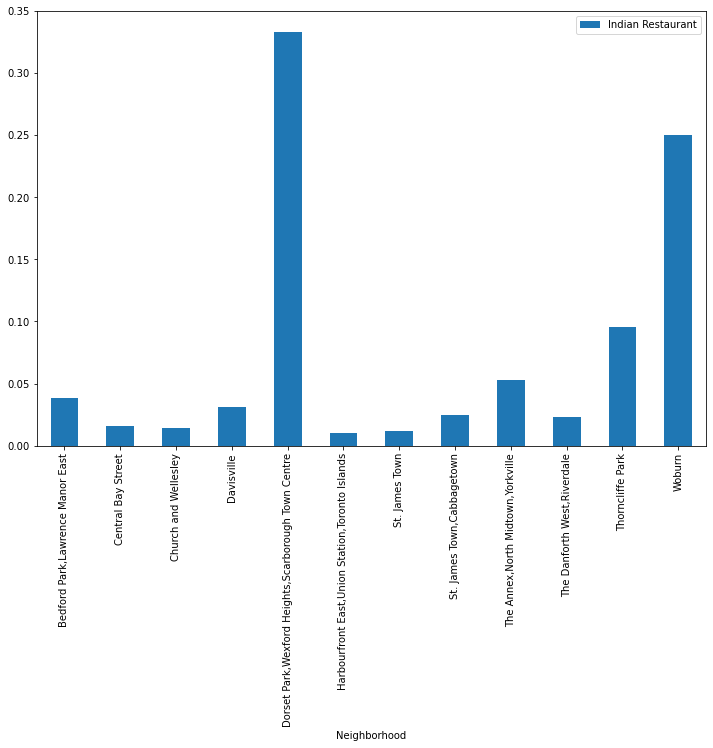

In [28]:
#Toronto_Indian_Restaurant[["Indian Restaurant" > "0"]]
Toronto_Indian_Restaurant.loc[Toronto_Indian_Restaurant['Indian Restaurant'] > 0].plot(kind='bar',x='Neighborhood', figsize=(12,8))

### Extracting Indian Ethinic population by Riding/Neighborhood and combining into single dataframe

Data Cleansing

Standardizing Column names for each dataframe

In [33]:
for name in [df_pop_tor_eyrk,df_pop_nyrk,df_pop_scrb,df_pop_eto]:
    name.columns=name.columns.str.replace('#','')
    name.columns

In [36]:
for name in [df_pop_tor_eyrk,df_pop_nyrk,df_pop_scrb,df_pop_eto]:
    for i, val in enumerate(name.columns.values):
        if val == "%":
            name.columns.values[i] = ('Ethnic Origin 1 Pct')
        else:
            for j in range(9):
                if val=="%."+str(j):
                    name.columns.values[i] = ('Ethnic Origin '+str(j+1)+' Pct')        

In [37]:
for name in [df_pop_tor_eyrk,df_pop_nyrk,df_pop_scrb,df_pop_eto]: 
    print("Columns: ",name.columns)

Columns:  Index(['Riding', 'Population', 'Ethnic Origin 1', 'Ethnic Origin 1 Pct',
       'Ethnic Origin 2', 'Ethnic Origin 2 Pct', 'Ethnic Origin 3',
       'Ethnic Origin 3 Pct', 'Ethnic Origin 4', 'Ethnic Origin 4 Pct',
       'Ethnic Origin 5', 'Ethnic Origin 5 Pct', 'Ethnic Origin 6',
       'Ethnic Origin 6 Pct', 'Ethnic Origin 7', 'Ethnic Origin 7 Pct',
       'Ethnic Origin 8', 'Ethnic Origin 8 Pct', 'Ethnic Origin 9',
       'Ethnic Origin 9 Pct'],
      dtype='object')
Columns:  Index(['Riding', 'Population', 'Ethnic Origin 1', 'Ethnic Origin 1 Pct',
       'Ethnic Origin 2', 'Ethnic Origin 2 Pct', 'Ethnic Origin 3',
       'Ethnic Origin 3 Pct', 'Ethnic Origin 4', 'Ethnic Origin 4 Pct',
       'Ethnic Origin 5', 'Ethnic Origin 5 Pct', 'Ethnic Origin 6',
       'Ethnic Origin 6 Pct', 'Ethnic Origin 7', 'Ethnic Origin 7 Pct',
       'Ethnic Origin 8', 'Ethnic Origin 8 Pct'],
      dtype='object')
Columns:  Index(['Riding', 'Population', 'Ethnic Origin 1', 'Ethnic Origin 1 Pct'

In [85]:
Toronto_Indian_Ethnic=pd.DataFrame(columns=['Riding','Population','Ethnic','Percentage'])
for name in [df_pop_tor_eyrk,df_pop_nyrk,df_pop_scrb,df_pop_eto]: 
    for i in range (8):
        col1='Ethnic Origin '+str(i+1)
        col2='Ethnic Origin '+str(i+1)+" Pct"
        dict={col1:"Ethnic",col2:"Percentage"}
        tmp_df=name.loc[name[col1]=='East Indian',['Riding','Population',col1,col2]]
        tmp_df.rename(columns=dict,inplace=True)
        #print("tmp df is:", tmp_df.iloc[:,0:4])
        Toronto_Indian_Ethnic=Toronto_Indian_Ethnic.append(tmp_df,ignore_index=True)
tmp_df=df_pop_tor_eyrk.loc[df_pop_tor_eyrk['Ethnic Origin 9']=='East Indian',['Riding','Population','Ethnic Origin 9','Ethnic Origin 9 Pct']]
tmp_df.rename(columns={"Ethnic Origin 9":"Ethnic","Ethnic Origin 9 Pct":"Percentage"},inplace=True)
Toronto_Indian_Ethnic=Toronto_Indian_Ethnic.append(tmp_df,ignore_index=True)
Toronto_Indian_Ethnic

,Riding,Population,Ethnic,Percentage
0,Don Valley East,93170,East Indian,10.6
1,Don Valley North,109060,East Indian,7.3
2,Humber River-Black Creek,107725,East Indian,9.2
3,Scarborough-Rouge Park,101445,East Indian,16.7
4,Scarborough-Guildwood,101115,East Indian,18.0
5,Scarborough Centre,110450,East Indian,12.2
6,Scarborough-Agincourt,104225,East Indian,7.4
7,Scarborough North,97610,East Indian,11.8
8,Scarborough Southwest,108295,East Indian,8.2
9,Etobicoke North,116960,East Indian,22.2


In [41]:
#Toronto_Indian_Ethnic['Indian Population']=Toronto_Indian_Ethnic['Population']*Toronto_Indian_Ethnic['Percentage']/100
Toronto_Indian_Ethnic

,Riding,Population,Ethnic,Percentage,Indian Population
0,Don Valley East,93170,East Indian,10.6,9876.02
1,Don Valley North,109060,East Indian,7.3,7961.38
2,Humber River-Black Creek,107725,East Indian,9.2,9910.7
3,Scarborough-Rouge Park,101445,East Indian,16.7,16941.3
4,Scarborough-Guildwood,101115,East Indian,18.0,18200.7
5,Scarborough Centre,110450,East Indian,12.2,13474.9
6,Scarborough-Agincourt,104225,East Indian,7.4,7712.65
7,Scarborough North,97610,East Indian,11.8,11518
8,Scarborough Southwest,108295,East Indian,8.2,8880.19
9,Etobicoke North,116960,East Indian,22.2,25965.1


In [86]:
Toronto_Indian_Population_Restaurant=pd.merge(Toronto_Indian_Restaurant,Toronto_Indian_Ethnic[['Riding','Population']],how='outer',left_on='Neighborhood',right_on='Riding')
Toronto_Indian_Population_Restaurant#[['Neighborhood','Riding','Indian Population','Indian Restaurant']]

,Neighborhood,Indian Restaurant,Riding,Population
0,Agincourt,0.000000,NaN,NaN
1,"Alderwood,Long Branch",0.000000,NaN,NaN
2,"Bathurst Manor,Wilson Heights,Downsview North",0.000000,NaN,NaN
3,Bayview Village,0.000000,NaN,NaN
4,"Bedford Park,Lawrence Manor East",0.038462,NaN,NaN
...,...,...,...,...
104,NaN,NaN,Scarborough Centre,110450
105,NaN,NaN,Scarborough-Agincourt,104225
106,NaN,NaN,Scarborough North,97610
107,NaN,NaN,Scarborough Southwest,108295


In [87]:
new=pd.merge(Toronto_Indian_Restaurant.set_index('Neighborhood',drop=True),Toronto_Indian_Ethnic[['Riding','Population']].set_index('Riding',drop=True), how='outer',left_on=['Neighborhood'],right_on=['Riding'], left_index=True, right_index=True).reset_index()

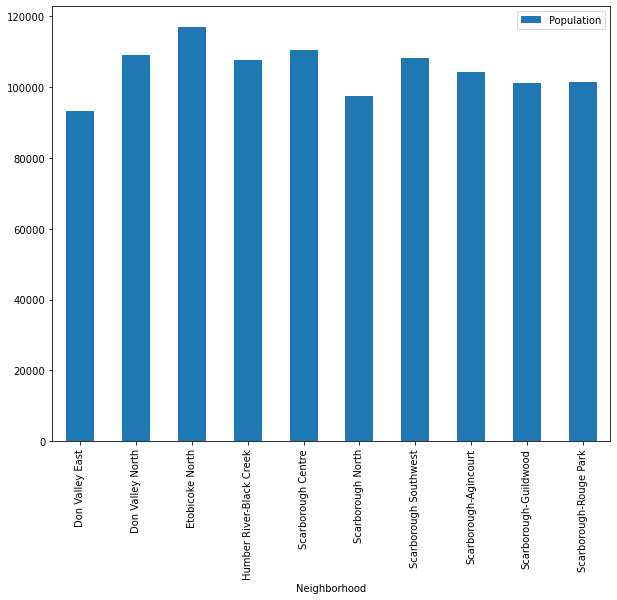

In [88]:
Tornto_Indian_Population_Restaurant=new[['Neighborhood','Indian Restaurant','Population']].fillna(0)
Tornto_Indian_Population_Restaurant[Tornto_Indian_Population_Restaurant['Population']>0].plot(kind='bar', x='Neighborhood', y='Population', figsize=(10,8))

#### There is no relationship built up between Indian Restaurant number and Indian Population based on Neighborhood/Riding.

 #### Neighborhood/Riding with Indian Population do not have Indian Restaurant


### Model Building using KMeans

In [30]:
from sklearn.cluster import KMeans

Toronto_Clust=Toronto_Indian_Restaurant.drop('Neighborhood',1)

cost=[]
for i in range(2,13):
    KM = KMeans(n_clusters=i, max_iter=100)
    KM.fit(Toronto_Clust)
    cost.append(KM.inertia_/100)


#### Plot K Values Against Cost

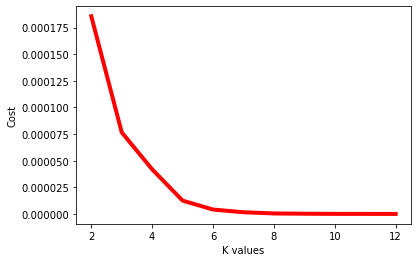

In [34]:
plt.plot (range(2,13),cost, color='r', linewidth='4')
plt.xlabel('K values')
plt.ylabel('Cost')
plt.show()

#### From the elbow graph, it's visible, at K=6, graph started flatenning.

#### Applying KMeans Clustering with K=6 on Indian Restaurant dataset to cluster the neighborhood based on Indian Restaurant numbers


In [35]:
k_clust=6
km=KMeans(n_clusters=k_clust, random_state=0).fit(Toronto_Clust)
print(km.labels_)

Toronto_Indian_Restaurant.insert(0,'Cluster Lable',km.labels_)
Toronto_Indian_Restaurant.head()

[0 0 0 0 4 0 0 0 0 0 0 5 0 5 0 0 0 0 4 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 5 5 0 0 0 4 0 0 5 0 2 0 0 0 0 0 0 0 0 0 3 0 0 0]


,Cluster Lable,Neighborhood,Indian Restaurant
0,0,Agincourt,0.000000
1,0,"Alderwood,Long Branch",0.000000
2,0,"Bathurst Manor,Wilson Heights,Downsview North",0.000000
3,0,Bayview Village,0.000000
4,4,"Bedford Park,Lawrence Manor East",0.038462


#### Merging Clustered data set with actual toronto dataframe having geo location

In [36]:
Toronto_Final=df_toronto_geo
Toronto_Final=Toronto_Final.join(Toronto_Indian_Restaurant.set_index('Neighborhood'), on='Neighborhood')
#print(Toronto_Final.head())
Toronto_Final.dropna(subset=["Cluster Lable"],axis=0,inplace=True)
Toronto_Final.reset_index(drop=True, inplace=True)
Toronto_Final['Cluster Lable'].astype(int)
Toronto_Final.head()


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Lable,Indian Restaurant
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353,0.0,0.00
1,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497,0.0,0.00
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,0.0,0.00
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3.0,0.25
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.00


#### Getting Geo location of Toronto

In [38]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [39]:
from geopy.geocoders import Nominatim
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Toronto&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347

In [40]:
latitude='43.6534817'
longitude='-79.3839347'

#### Plotting the cluserts in Map to visualize

In [41]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clust)
ys = [i + x + (i*x)**2 for i in range(k_clust)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, nei, cluster in zip(Toronto_Final['Latitude'], Toronto_Final['Longitude'], Toronto_Final['Neighborhood'], Toronto_Final['Cluster Lable']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        #fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Evaluate the Cluster

   #### We have total 6 clusters. These are 0,1,2,3,4,5,6
   
   ##### Custer 0 : This cluster contains the neighborhood having the least number of Indian Restaurant

In [42]:
Toronto_Final[Toronto_Final['Cluster Lable']==0]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Lable,Indian Restaurant
0,M1B,Scarborough,"Malvern,Rouge",43.806686,-79.194353,0.0,0.0
1,M1C,Scarborough,"Rouge Hill,Port Union,Highland Creek",43.784535,-79.160497,0.0,0.0
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711,0.0,0.0
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,0.0
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.0,0.0
...,...,...,...,...,...,...,...
94,M9N,York,Weston,43.706876,-79.518188,0.0,0.0
95,M9P,Etobicoke,Westmount,43.696319,-79.532242,0.0,0.0
96,M9R,Etobicoke,"Kingsview Village,St. Phillips,Martin Grove Ga...",43.688905,-79.554724,0.0,0.0
97,M9V,Etobicoke,"South Steeles,Silverstone,Humbergate,Jamestown...",43.739416,-79.588437,0.0,0.0


In [43]:
Toronto_Final[Toronto_Final['Cluster Lable']==0].groupby(by='Borough').sum()

,Latitude,Longitude,Cluster Lable,Indian Restaurant
Borough,,,,
Central Toronto,262.251210,-476.412958,0.0,0.0
Downtown Toronto,523.844521,-952.635732,0.0,0.0
Downtown TorontoStn A PO Boxes25 The Esplanade,43.646435,-79.374846,0.0,0.0
East Toronto,131.004881,-237.949526,0.0,0.0
East TorontoBusiness reply mail Processing Centre969 Eastern,43.662744,-79.321558,0.0,0.0
East York,131.110802,-237.991777,0.0,0.0
East YorkEast Toronto,43.685347,-79.338106,0.0,0.0
Etobicoke,436.545912,-795.378586,0.0,0.0
EtobicokeNorthwest,43.706748,-79.594054,0.0,0.0


##### Custer 1 : This cluster contains the neighborhood having the moderate to High number of Indian Restaurant

In [53]:
Toronto_Final[Toronto_Final['Cluster Lable']==1]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Lable,Indian Restaurant
10,M1P,Scarborough,"Dorset Park,Wexford Heights,Scarborough Town C...",43.75741,-79.273304,1.0,0.333333


##### Custer 2 : This cluster contains the neighborhood having the low number of Indian Restaurant


In [54]:
Toronto_Final[Toronto_Final['Cluster Lable']==2]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Lable,Indian Restaurant
37,M4H,East York,Thorncliffe Park,43.705369,-79.349372,2.0,0.095238


##### Custer 3 : This cluster contains the neighborhood having the moderate to low number of Indian Restaurant

In [46]:
Toronto_Final[Toronto_Final['Cluster Lable']==3]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Lable,Indian Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3.0,0.25


##### Custer 4 : This cluster contains the neighborhood having the very low number of Indian Restaurant

In [49]:
Toronto_Final[Toronto_Final['Cluster Lable']==4]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Lable,Indian Restaurant
45,M4S,Central Toronto,Davisville,43.704324,-79.388790,4.0,0.031250
59,M5M,North York,"Bedford Park,Lawrence Manor East",43.733283,-79.419750,4.0,0.038462
62,M5R,Central Toronto,"The Annex,North Midtown,Yorkville",43.672710,-79.405678,4.0,0.052632


##### Custer 5 : This cluster contains the neighborhood having very low number of Indian Restaurant

In [50]:
Toronto_Final[Toronto_Final['Cluster Lable']==5]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Lable,Indian Restaurant
39,M4K,East Toronto,"The Danforth West,Riverdale",43.679557,-79.352188,5.0,0.023256
48,M4X,Downtown Toronto,"St. James Town,Cabbagetown",43.667967,-79.367675,5.0,0.024390
49,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,5.0,0.014286
52,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,5.0,0.012195
54,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,5.0,0.015625
56,M5J,Downtown Toronto,"Harbourfront East,Union Station,Toronto Islands",43.640816,-79.381752,5.0,0.010000


##### Custer 6 : This cluster contains the neighborhood having the moderate number of Indian 

In [55]:
Toronto_Final[Toronto_Final['Cluster Lable']==6]

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Lable,Indian Restaurant


#### Overall Indian Restaurant numbers by Borough and Cluster

In [48]:
Toronto_Final.groupby(by=['Borough','Cluster Lable']).sum()

Latitude  \
Borough                                            Cluster Lable               
Central Toronto                                    0.0            262.251210   
                                                   4.0             87.377034   
Downtown Toronto                                   0.0            523.844521   
                                                   5.0            218.284089   
Downtown TorontoStn A PO Boxes25 The Esplanade     0.0             43.646435   
East Toronto                                       0.0            131.004881   
                                                   5.0             43.679557   
East TorontoBusiness reply mail Processing Cent... 0.0             43.662744   
East York                                          0.0            131.110802   
                                                   2.0             43.705369   
East YorkEast Toronto                              0.0             43.685347   
Etobicoke                                          0.0            436.545912   
EtobicokeNorthwest                                 0.0             43.706748   
MississaugaCanada Post Gateway Processing Centre   0.0             43.636966   
North York                                         0.0            962.495123   
                                                   4.0             43.733283   
Queen's Park                                       0.0             43.662301   
Scarborough                                        0.0            612.661365   
                                                   1.0             43.757410   
                                                   3.0             43.770992   
West Toronto                                       0.0            261.915918   
York                                               0.0            218.453984   

                                                                    Longitude  \
Borough                                            Cluster Lable                
Central Toronto                                    0.0            -476.412958   
                                                   4.0            -158.794468   
Downtown Toronto                                   0.0            -952.635732   
                                                   5.0            -396.895388   
Downtown TorontoStn A PO Boxes25 The Esplanade     0.0             -79.374846   
East Toronto                                       0.0            -237.949526   
                                                   5.0             -79.352188   
East TorontoBusiness reply mail Processing Cent... 0.0             -79.321558   
East York                                          0.0            -237.991777   
                                                   2.0             -79.349372   
East YorkEast Toronto                              0.0             -79.338106   
Etobicoke                                          0.0            -795.378586   
EtobicokeNorthwest                                 0.0             -79.594054   
MississaugaCanada Post Gateway Processing Centre   0.0             -79.615819   
North York                                         0.0           -1747.475877   
                                                   4.0             -79.419750   
Queen's Park                                       0.0             -79.389494   
Scarborough                                        0.0           -1109.538592   
                                                   1.0             -79.273304   
                                                   3.0             -79.216917   
West Toronto                                       0.0            -476.695739   
York                                               0.0            -397.363167   

                                                                  Indian Restaurant  
Borough                                            Cluster Lable                     
Central Toronto               

### Discussion

Based on the fact and Analysis done, following are key take aways:

1. The Boroughs like Central Toronto, Downtown Toronto,East Toronto,East York, North York, Scarborough are sparsly or densely populated with Indian Restaurant. 
2. From the Indian population bar chart, it is also clearly visible that scarborogh is also modertely populated with Indians.
3. So opening a restaurant in Scarborough might attract good foot fall but competetion will be high
4. Etobicocke is one borough which have most densly indian population.
5. Also there is no Indian Restaurant in Etobicocke borough
6. Other boroughs like West Toronto, York, Queen's Park, Etobicoke, MississaugaCanada Post Gateway Processing Centre neither have Indian population, nor have Indian Restaurant



### Conclusion

With Above analysis, it is recommended to leave Scarborough to avoid Higher competetion which would impact the lesser profitability. 
Etobicoke is the Borough which should be considered to open Indian Restaurant due to heavy Indian Population and Limited to no competetion.